# Getting Started: Market Research
This Jupyter notebook is a quick demonstration on how to get started on the market research section.

## 1) Download Data
Please download the train and test data and place it within the ./research/data path. If you've placed it in the correct place, you should see the following cell work:

In [13]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

print(train_data.head())
print(test_data.head())

   time         A         B         C         D         E         F         G  \
0     0  0.207366 -0.159951 -0.634176 -0.580962 -0.266505  0.060173 -0.475257   
1     1  0.188828 -0.265508  0.042143 -0.550442 -0.132319 -0.185219  0.028295   
2     2 -0.144261 -0.577142 -0.214634 -0.747391 -0.184255 -0.464831 -0.085181   
3     3  0.208982 -0.310449  0.513708 -0.562868  0.742308 -0.305487  0.762246   
4     4  0.093320 -0.358156  0.173188 -0.687296 -0.161461 -0.116062 -0.245748   

          H         I         J         K         L         M         N  \
0 -1.486516 -0.332594 -0.671466 -0.226149 -0.187624 -0.780237 -0.785965   
1  0.093210 -0.518139 -0.251917 -0.347845 -0.359069 -0.161254  0.020401   
2  0.700449 -0.603438  0.197773 -0.566696 -0.580799  0.202726  0.135261   
3  1.363020 -0.384575  0.525556 -0.348514 -0.428099  0.548993  0.471031   
4  0.863372 -0.655588 -0.263358 -0.557428 -0.481214  0.083602  0.003087   

         Y1        Y2  
0 -0.935902 -0.310081  
1 -0.089707 -0

## 2) Investigate the Dataset
In the datasets, you're given columns of time and A through N, each of which represent some sort of real-life market quantity. In the train dataset, you're also given Y1 and Y2, real-life market quantities you'd like to predict in terms of time and A through N. You're not given Y1 and Y2 in the test set, because this is what you're being asked to predict.

Let's do some exploration of the relationships of A - N and Y1. In particular, let's look at the relationship between C and Y1:

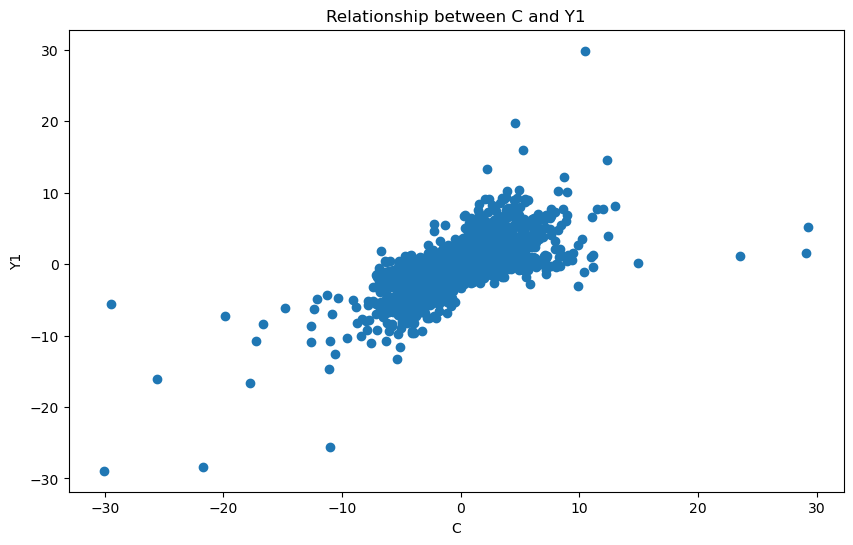

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train_data['C'], train_data['Y1'])
plt.xlabel('C')
plt.ylabel('Y1')
plt.title('Relationship between C and Y1')
plt.show()

In [15]:
# Calculate correlation between C and Y1
correlation = train_data['C'].corr(train_data['Y1'])
print(f"Correlation between C and Y1: {correlation:.4f}")

Correlation between C and Y1: 0.7038


Clearly there's a strong relationship between C and Y1. You should definitely use C to predict Y1!

## 3) Submit Predictions
In order to submit predictions, we need to make a CSV file with three columns: id, Y1, and Y2. In the below example, we let our predictions of Y1 and Y2 be the means of Y1 and Y2 in the train set.

In [16]:
preds = test_data[['id']]
preds['Y1'] = train_data['Y1'].mean()
preds['Y2'] = train_data['Y2'].mean()
preds

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/2816426628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y1'] = train_data['Y1'].mean()
/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/2816426628.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['Y2'] = train_data['Y2'].mean()


,id,Y1,Y2
0,1,-0.002807,-0.061172
1,2,-0.002807,-0.061172
2,3,-0.002807,-0.061172
3,4,-0.002807,-0.061172
4,5,-0.002807,-0.061172
...,...,...,...
15991,15992,-0.002807,-0.061172
15992,15993,-0.002807,-0.061172
15993,15994,-0.002807,-0.061172
15994,15995,-0.002807,-0.061172


In [17]:
# save preds to csv
preds.to_csv('preds.csv', index=False)

You should now be able to submit preds.csv to [https://quantchallenge.org/dashboard/data/upload-predictions](https://quantchallenge.org/dashboard/data/upload-predictions)! Note that you should receive a public $R^2$ score of $-0.042456$ with this set of predictions. You should try to get the highest possible $R^2$ score over the course of these next few days. Be careful of overfitting to the public score, which is only calculated on a subset of the test data—the final score that counts is the private $R^2$ score!

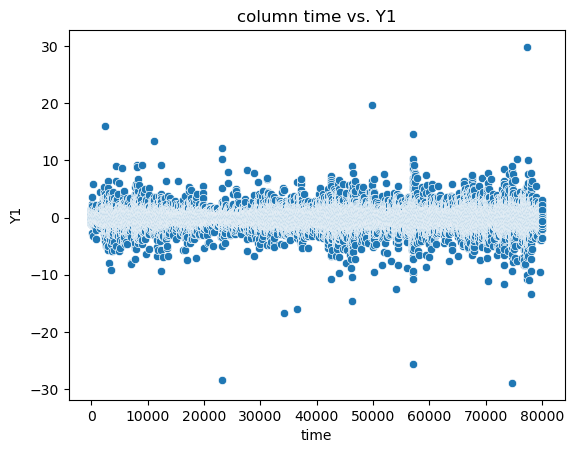

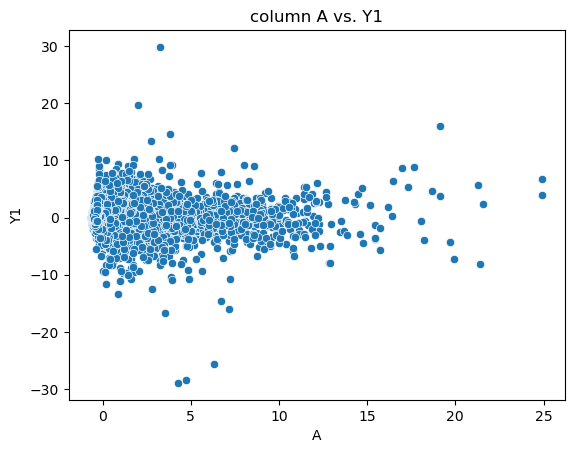

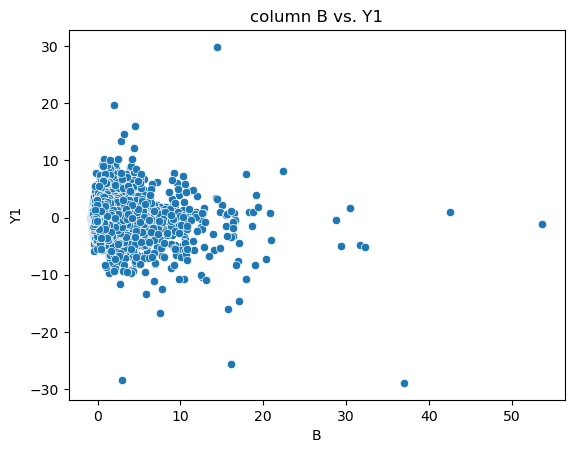

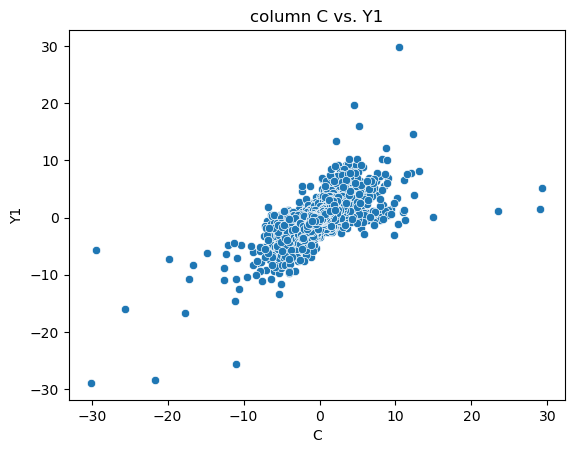

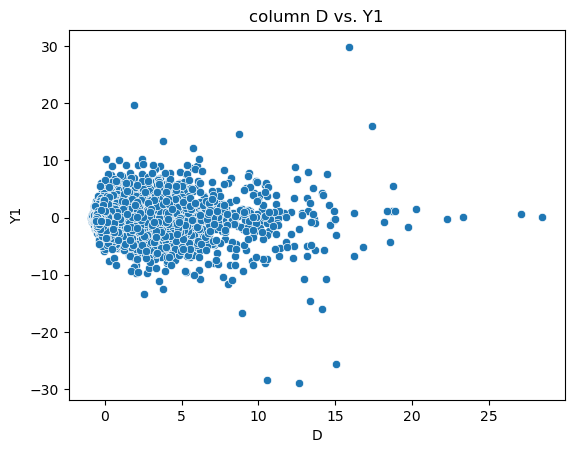

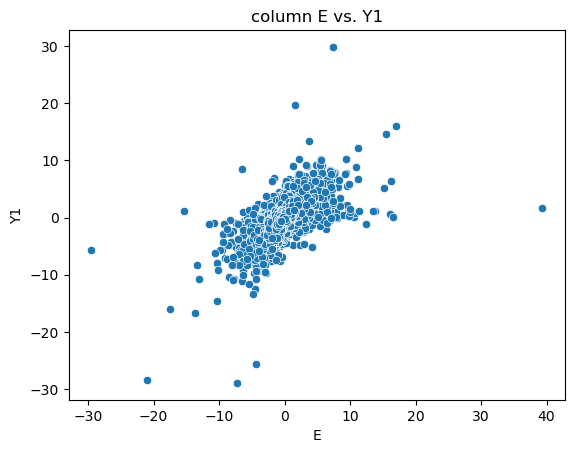

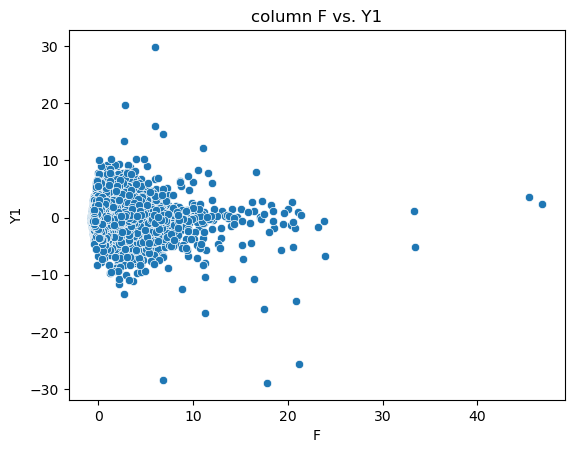

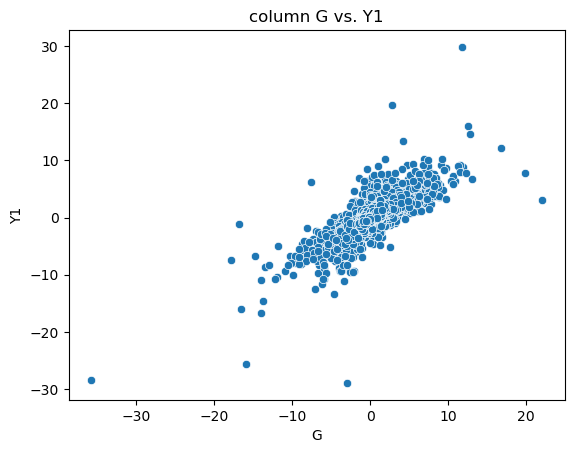

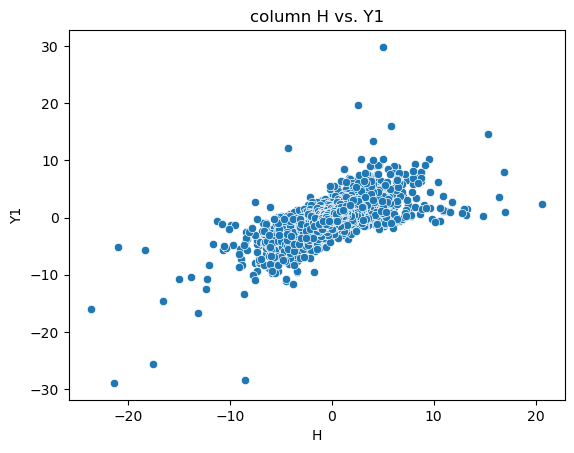

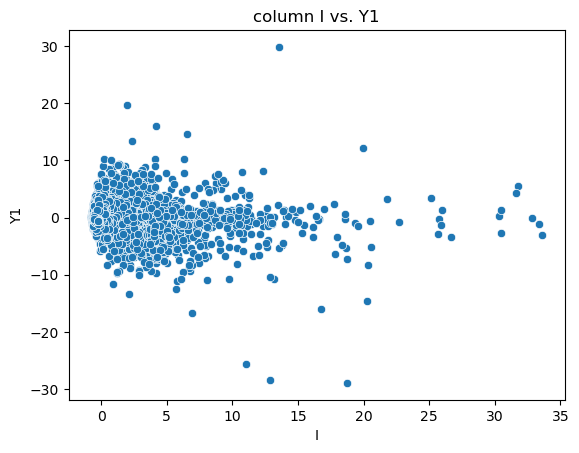

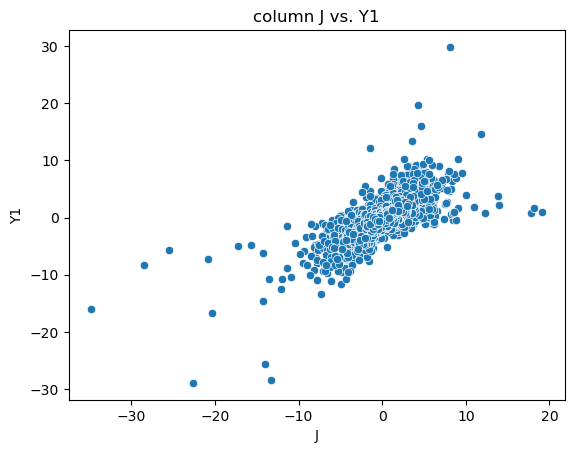

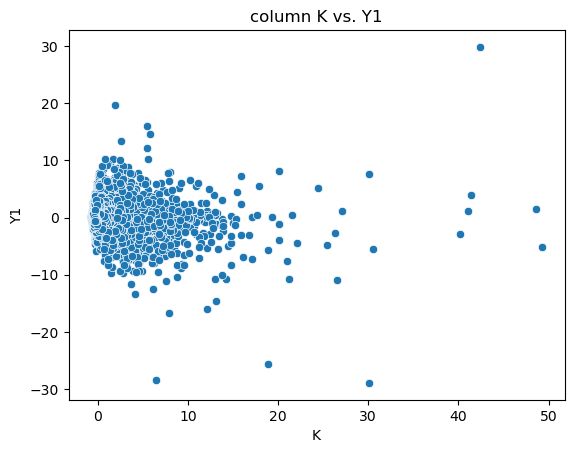

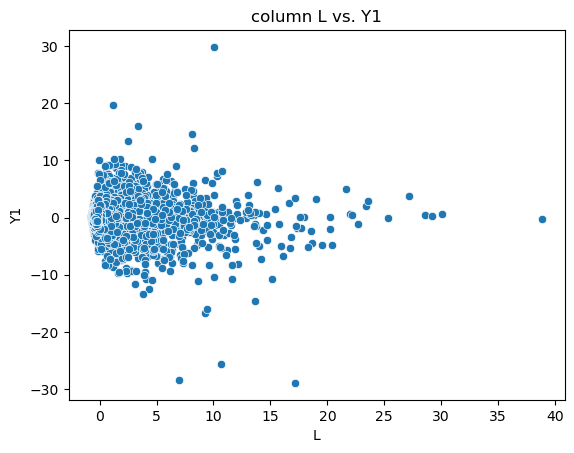

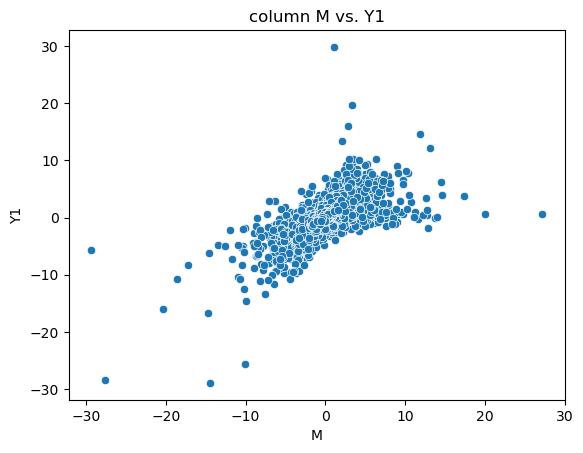

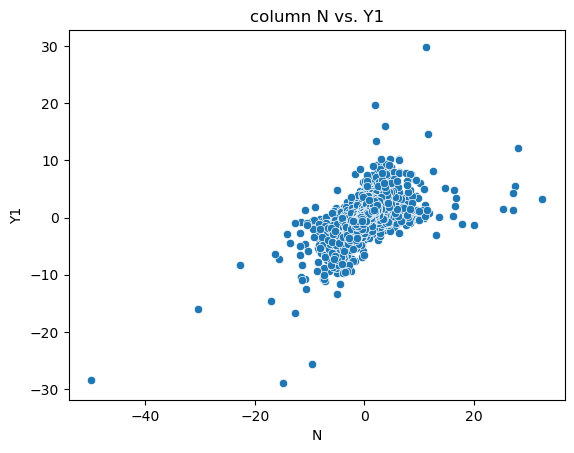

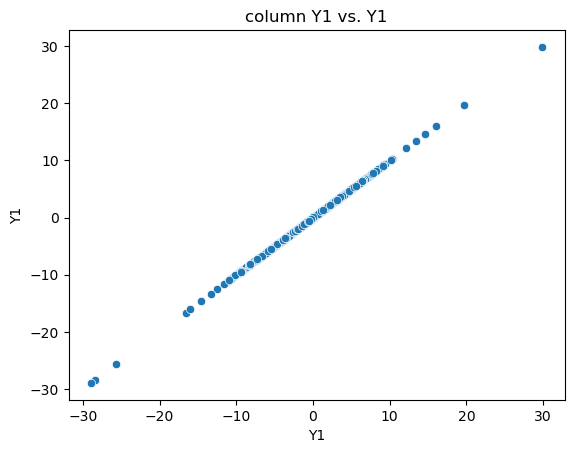

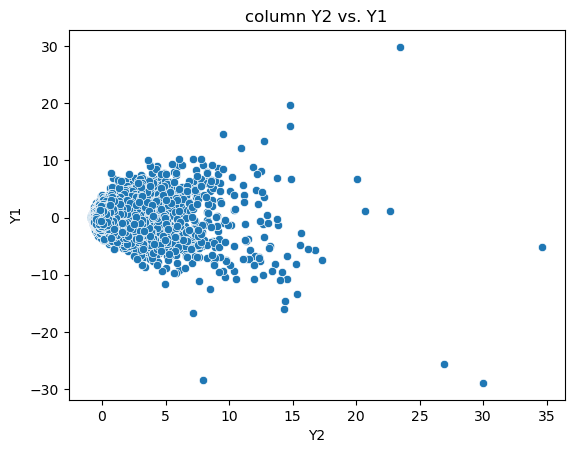

In [18]:
import seaborn as sns
for column in train_data.columns:
    sns.scatterplot(x=column, y="Y1", data=train_data)
    plt.title(f"column {column} vs. Y1")
    plt.show()

In [19]:
from sklearn.feature_selection import mutual_info_regression

features = train_data.drop(columns=["Y1", "Y2"])
target = train_data["Y1"]
mi = mutual_info_regression(features, target, random_state=42)
mi_series = pd.Series(mi, index=features.columns)
mi_series.sort_values(ascending=False, inplace=True)
mi_series

G       0.632265
M       0.451499
J       0.435008
C       0.419357
E       0.410977
H       0.407996
N       0.296612
D       0.108373
K       0.105551
B       0.105377
L       0.083804
time    0.080855
A       0.073677
I       0.068379
F       0.064290
dtype: float64

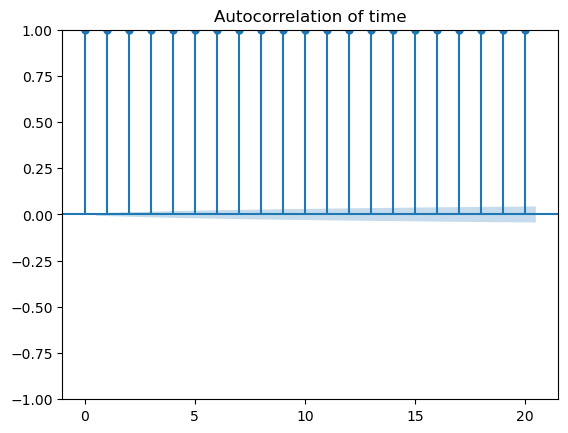

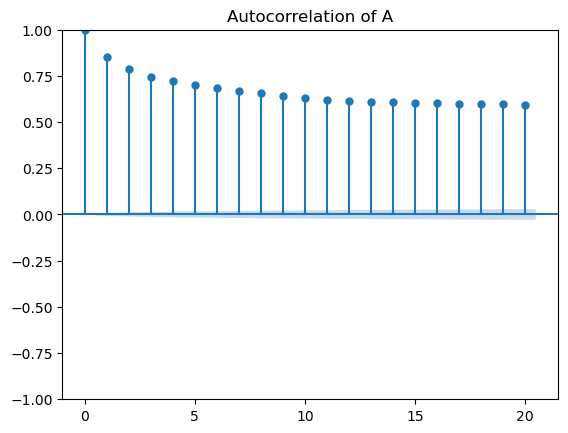

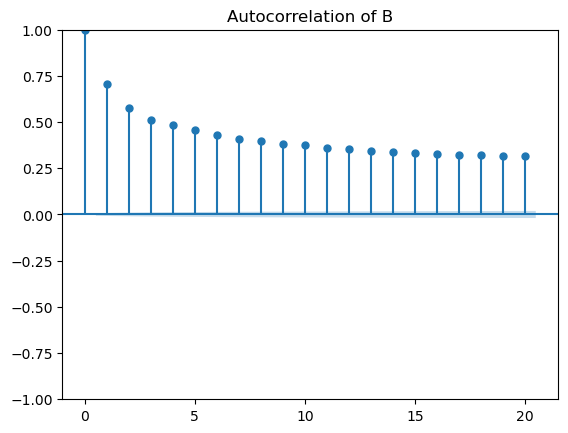

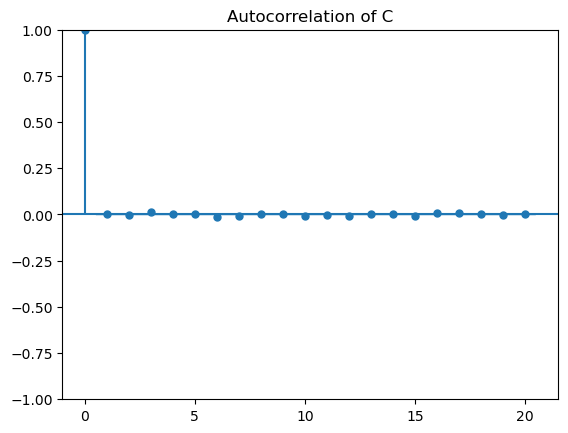

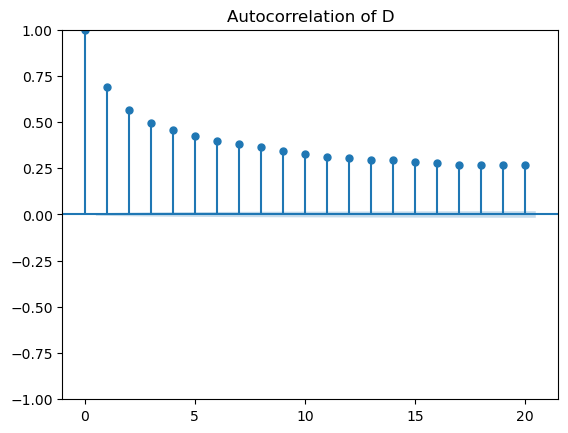

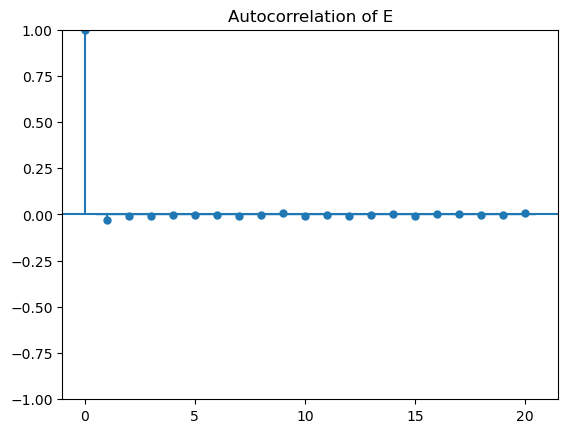

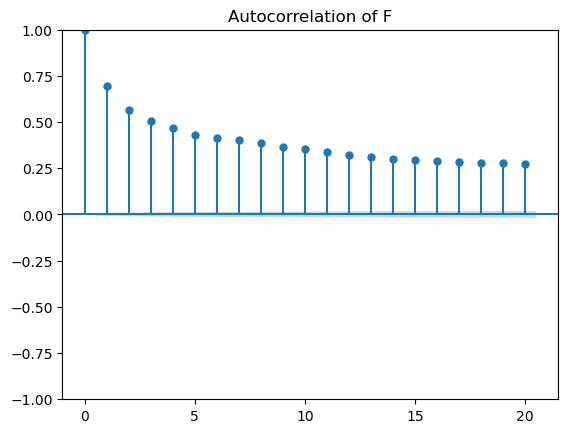

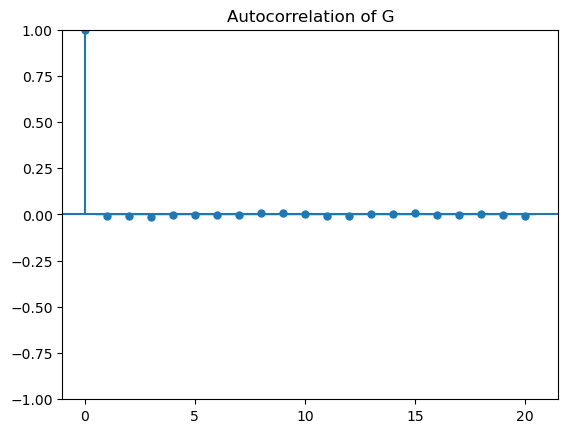

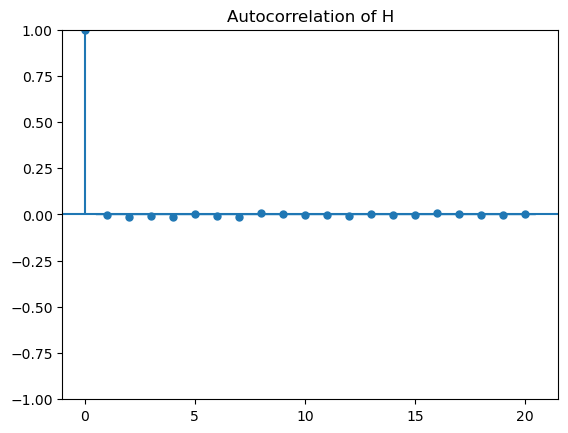

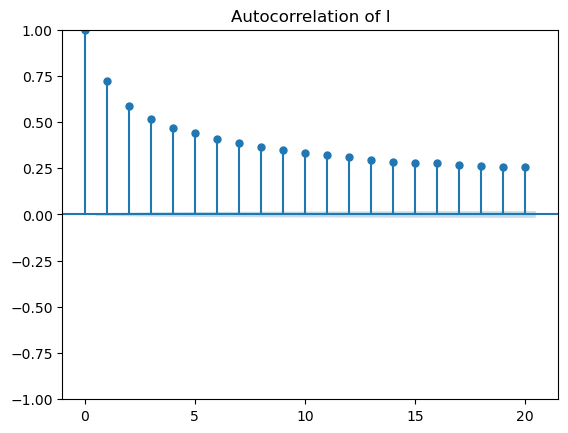

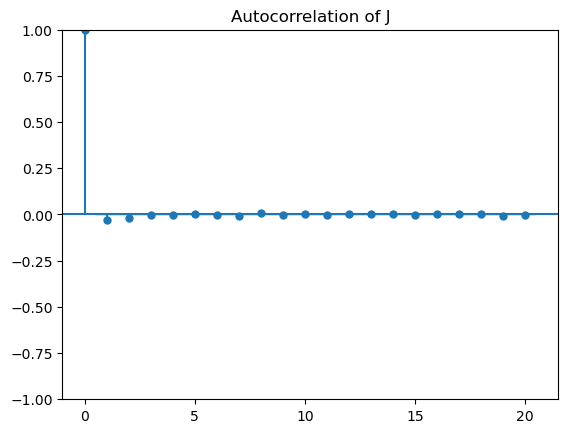

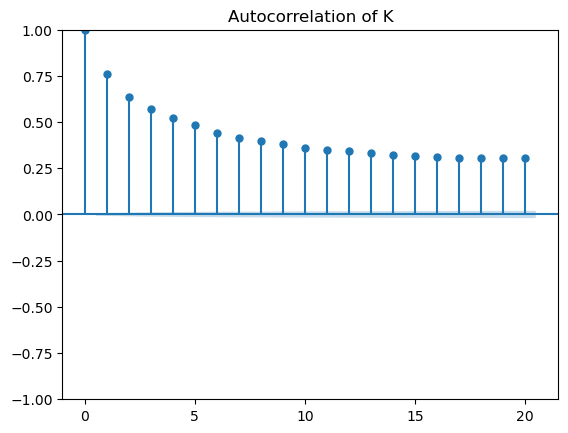

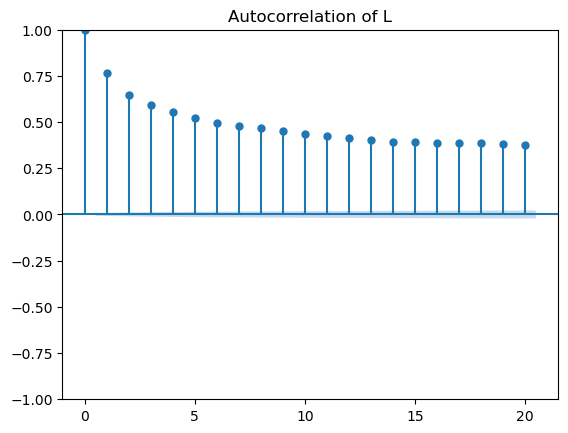

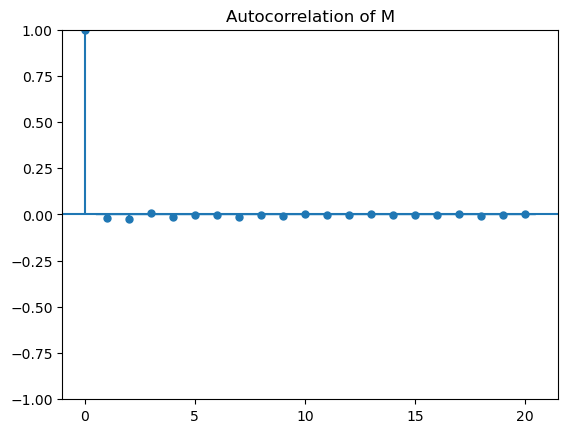

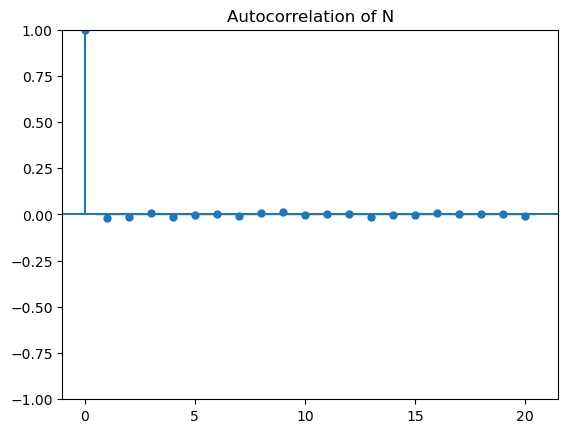

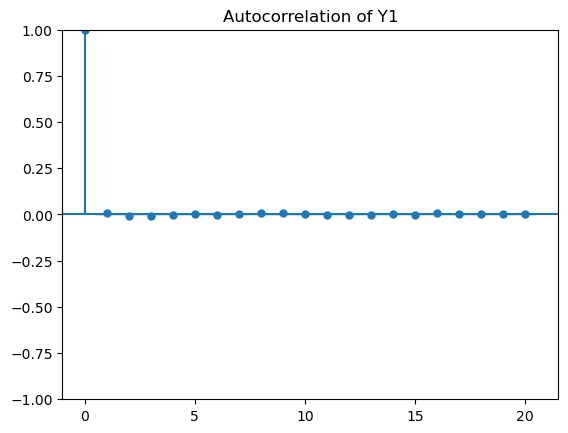

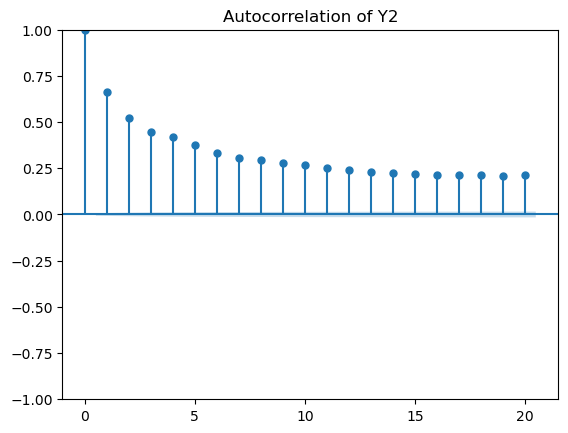

In [20]:
#checking autocorrelation
from statsmodels.graphics.tsaplots import plot_acf

for column in train_data.columns:
    plot_acf(train_data[column], lags=20)
    plt.title(f"Autocorrelation of {column}")
    plt.show()

In [21]:
features = train_data.drop(columns=["Y1", "Y2"])
target = train_data["Y2"]
mi = mutual_info_regression(features, target, random_state=42)
mi_series = pd.Series(mi, index=features.columns)
mi_series.sort_values(ascending=False, inplace=True)
mi_series

A       0.309733
K       0.277269
B       0.267202
D       0.265187
time    0.240545
L       0.206485
I       0.201162
F       0.200788
G       0.165538
J       0.111665
C       0.111504
H       0.111343
M       0.105859
E       0.097464
N       0.088547
dtype: float64

In [22]:
res = []
for column in train_data.columns:
    for lag in range(0, 10):
        corr = train_data[column].shift(lag).corr(train_data["Y1"])
        res.append((corr, (f"column {column} lag {lag}")))
res.sort()
res.reverse()
for val in res[:50]:
    print(val)

(1.0, 'column Y1 lag 0')
(0.8145676054531668, 'column G lag 0')
(0.7239211700325072, 'column J lag 0')
(0.707559540964191, 'column H lag 0')
(0.7038226361647255, 'column C lag 0')
(0.6862459319438745, 'column M lag 0')
(0.6842967312919479, 'column E lag 0')
(0.5957664785850266, 'column N lag 0')
(0.023210517110534686, 'column K lag 2')
(0.021827201625830694, 'column K lag 3')
(0.019486013105472114, 'column K lag 4')
(0.015282695002365454, 'column K lag 1')
(0.014768134357083016, 'column Y2 lag 2')
(0.0137847796070217, 'column D lag 2')
(0.01377491314597782, 'column J lag 8')
(0.013471553732649418, 'column I lag 2')
(0.012969094003505958, 'column A lag 5')
(0.01296282101561911, 'column I lag 1')
(0.012557284912554008, 'column K lag 5')
(0.012130017550206823, 'column C lag 1')
(0.012028445392815038, 'column C lag 5')
(0.011893083728571958, 'column A lag 1')
(0.011374289079090357, 'column L lag 2')
(0.011286563484489053, 'column M lag 8')
(0.011223745308926203, 'column N lag 8')
(0.010990

In [23]:
#no need to lag anything

In [24]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [25]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV

In [26]:
from sklearn.decomposition import PCA

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
from sklearn.preprocessing import StandardScaler

In [33]:
import numpy as np
scaler = StandardScaler()
ridge = Pipeline([("scale", scaler), ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 20)))])
lasso = Pipeline([("scale", scaler), ("lasso", LassoCV(alphas=np.logspace(-3, 3, 20), cv=5))])
pca_regression = Pipeline([("scale", scaler), ("PCA", PCA(n_components=0.95)), ("regression", LinearRegression())])

In [34]:
tscv = TimeSeriesSplit(n_splits=5)

In [35]:
models = {
    "Lasso": lasso,
    "Ridge": ridge, 
    "PCA + Regression": pca_regression
}

In [36]:
features = ['G', 'J', 'H', 'C', 'M', 'E', 'N']
X = train_data[features]
y = train_data["Y1"]
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=tscv, scoring="r2")
    results[name] = scores
    print(f"{name} had r2 score mean {scores.mean()} and score std {scores.std()}")

Lasso had r2 score mean 0.7483805699773709 and score std 0.05155970864978515
Ridge had r2 score mean 0.7471979308869213 and score std 0.05057594661982828
PCA + Regression had r2 score mean 0.7461978535369702 and score std 0.051082111180046796


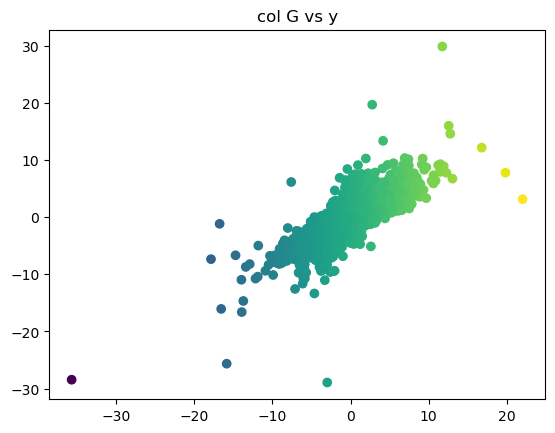

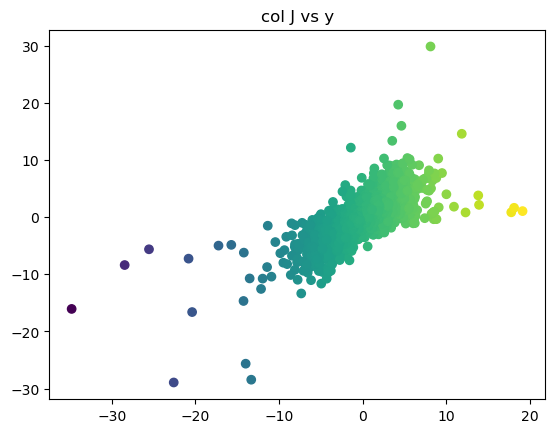

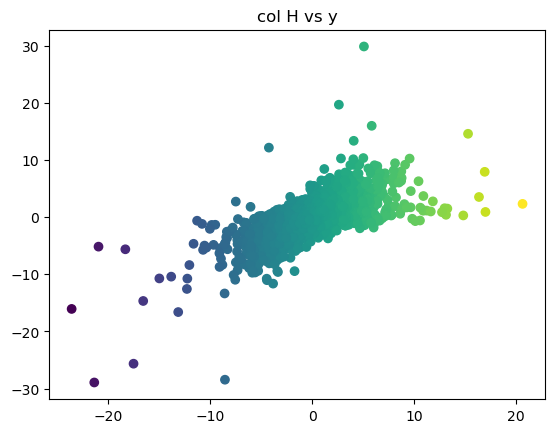

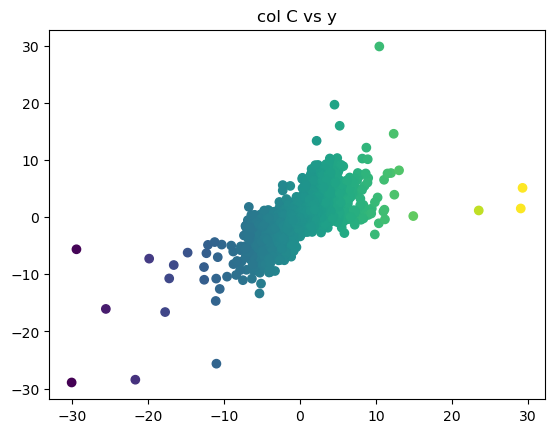

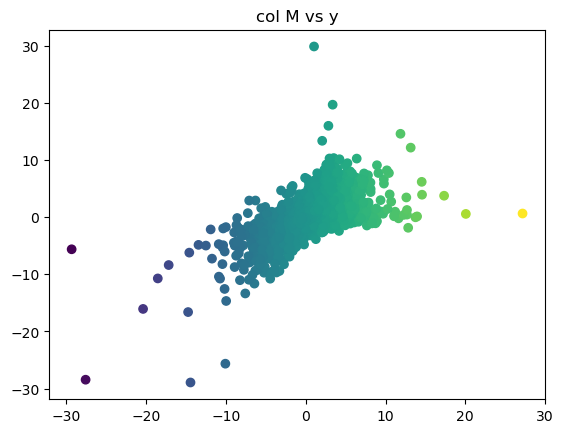

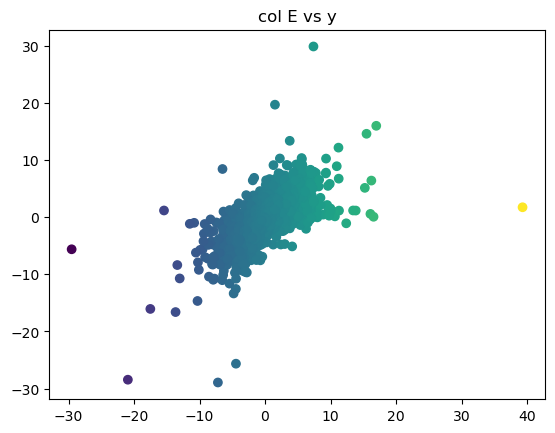

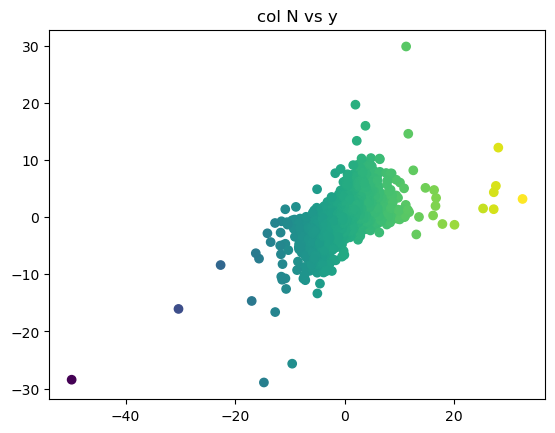

In [43]:
for col in features:
    plt.scatter(train_data[col], train_data["Y1"], c=train_data[col], cmap="viridis")
    plt.title(f"col {col} vs y")
    plt.show()

In [46]:
y1 = train_data[["Y1"]]
y2 = train_data["Y2"]
mi = mutual_info_regression(y1, y2, random_state=42)
mi_series = pd.Series(mi, index=y1.columns)
mi_series.sort_values(ascending=False, inplace=True)
mi_series

Y1    0.213881
dtype: float64

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/2048016487.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_data["Y1"], train_data["Y2"], cmap="viridis")


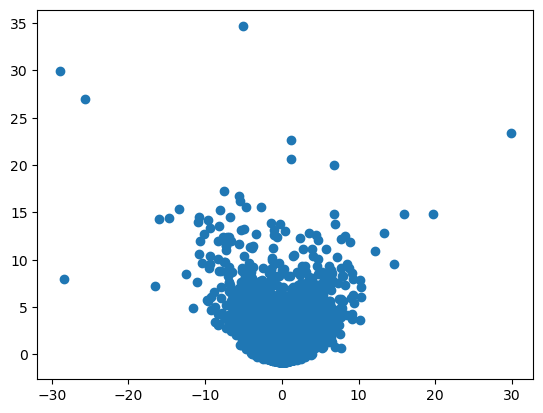

In [47]:
plt.scatter(train_data["Y1"], train_data["Y2"], cmap="viridis")
plt.show()

/var/folders/fn/yjtldss90130xtvc_mtjfkwr0000gn/T/ipykernel_53103/1341250821.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(train_data["Y2"].shift(1) - train_data["Y2"], train_data["Y1"], cmap="viridis")


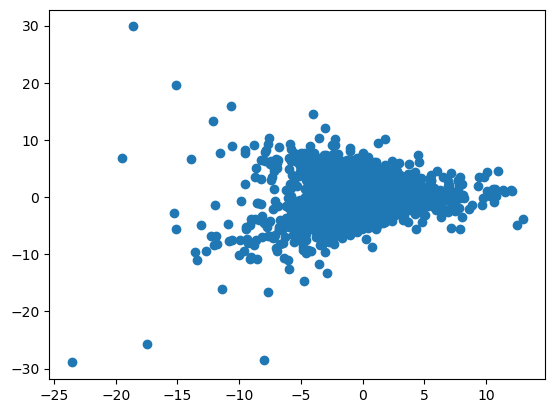

In [49]:
plt.scatter(train_data["Y2"].shift(1) - train_data["Y2"], train_data["Y1"], cmap="viridis")
plt.show()